# Dry Bean Dataset

######### Data Set Information: Seven different types of dry beans were used in this research, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the classification model, images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.

Attribute Information:

Area (A): The area of a bean zone and the number of pixels within its boundaries.
Perimeter (P): Bean circumference is defined as the length of its border.
Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.
Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
Aspect ratio (K): Defines the relationship between L and l.
Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.
Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
Roundness (R): Calculated with the following formula: (4piA)/(P^2)
Compactness (CO): Measures the roundness of an object: Ed/L
ShapeFactor1 (SF1)
ShapeFactor2 (SF2)
ShapeFactor3 (SF3)
ShapeFactor4 (SF4)
Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

# Import libraries 

In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

# Reading the  data 

In [7]:
data = pd.read_csv("Dry_Bean.csv")

In [8]:
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [9]:
data.shape

(13611, 17)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [11]:
features = data.columns.to_list()

In [12]:
target  = 'Class'

In [13]:
features.remove(target)


In [14]:
X= data[features].values

In [15]:
Y=  data[target].values

# Spliting Data 

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [18]:
X_train.shape

(10888, 16)

In [19]:
X_test.shape

(2723, 16)

In [20]:
Y_train.shape

(10888,)

In [21]:
Y_test.shape

(2723,)

#  1 Random Forrest 

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rf_clf = RandomForestClassifier()

In [24]:
rf_clf.fit(X_train, Y_train)

RandomForestClassifier()

In [25]:
y_pred = rf_clf.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.91      0.92      0.92       264
      BOMBAY       1.00      1.00      1.00        97
        CALI       0.94      0.93      0.93       314
    DERMASON       0.89      0.95      0.92       696
       HOROZ       0.96      0.96      0.96       395
       SEKER       0.95      0.96      0.95       413
        SIRA       0.91      0.82      0.86       544

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



In [28]:
confusion_matrix(Y_test, y_pred)

array([[243,   0,  14,   0,   2,   1,   4],
       [  0,  97,   0,   0,   0,   0,   0],
       [ 18,   0, 292,   0,   3,   0,   1],
       [  0,   0,   0, 661,   0,  12,  23],
       [  1,   0,   5,   1, 380,   0,   8],
       [  1,   0,   0,   9,   0, 395,   8],
       [  3,   0,   1,  75,  11,   8, 446]], dtype=int64)

In [29]:
accuracy_score(Y_test, y_pred)

0.9232464193903782

In [30]:
ac1= accuracy_score(y_true=Y_test, y_pred=y_pred)*100

In [31]:
print("Accuracy of testing data:", ac1)

Accuracy of testing data: 92.32464193903782


##  2 AdaBoost  Classifer 

In [32]:
from sklearn.ensemble import AdaBoostClassifier

In [33]:
adb_clf = AdaBoostClassifier()

In [34]:
adb_clf.fit(X_train, Y_train)

AdaBoostClassifier()

In [35]:
confusion_matrix(Y_test, y_pred)

array([[243,   0,  14,   0,   2,   1,   4],
       [  0,  97,   0,   0,   0,   0,   0],
       [ 18,   0, 292,   0,   3,   0,   1],
       [  0,   0,   0, 661,   0,  12,  23],
       [  1,   0,   5,   1, 380,   0,   8],
       [  1,   0,   0,   9,   0, 395,   8],
       [  3,   0,   1,  75,  11,   8, 446]], dtype=int64)

In [36]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.91      0.92      0.92       264
      BOMBAY       1.00      1.00      1.00        97
        CALI       0.94      0.93      0.93       314
    DERMASON       0.89      0.95      0.92       696
       HOROZ       0.96      0.96      0.96       395
       SEKER       0.95      0.96      0.95       413
        SIRA       0.91      0.82      0.86       544

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



In [37]:
accuracy_score(y_true=Y_test, y_pred=y_pred)

0.9232464193903782

In [38]:
ac2=accuracy_score(Y_test, y_pred)*100

In [39]:
print("Accuracy of testing data:", ac2)

Accuracy of testing data: 92.32464193903782


#  3 XGbost Classifer

In [40]:
import xgboost as xgb

In [41]:
xgb_clf = xgb.XGBClassifier()

In [42]:
y_train_mod = Y_train
y_test_mod = Y_test

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_mod = le.fit_transform(Y_train)

In [45]:
xgb_clf.fit(X_train, y_train_mod)

C:\Users\Rahul-PC\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:20:04] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [46]:
y_pred = xgb_clf.predict(X_test)

In [47]:
y_test_mod=le.fit_transform(Y_test)

In [48]:
confusion_matrix(y_test_mod , y_pred)

array([[247,   0,  12,   1,   1,   1,   2],
       [  0,  97,   0,   0,   0,   0,   0],
       [ 13,   0, 296,   0,   3,   0,   2],
       [  0,   0,   0, 666,   1,   9,  20],
       [  0,   0,   1,   2, 383,   0,   9],
       [  1,   0,   2,   7,   0, 395,   8],
       [  1,   0,   1,  76,   9,   5, 452]], dtype=int64)

In [49]:
print(classification_report(y_test_mod, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       264
           1       1.00      1.00      1.00        97
           2       0.95      0.94      0.95       314
           3       0.89      0.96      0.92       696
           4       0.96      0.97      0.97       395
           5       0.96      0.96      0.96       413
           6       0.92      0.83      0.87       544

    accuracy                           0.93      2723
   macro avg       0.95      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



In [50]:
accuracy_score(y_true = y_test_mod, y_pred = y_pred)

0.9313257436650753

In [51]:
ac3=accuracy_score(y_test_mod, y_pred)*100

In [52]:
print("Accuracy of test dataset:",ac3)

Accuracy of test dataset: 93.13257436650753


# 3 Perfomance Comparision 

In [53]:
import seaborn as sns

In [54]:
accuracy =  {ac1: 'Random forest', ac2: 'Adaboost', ac3: 'XGboost'}

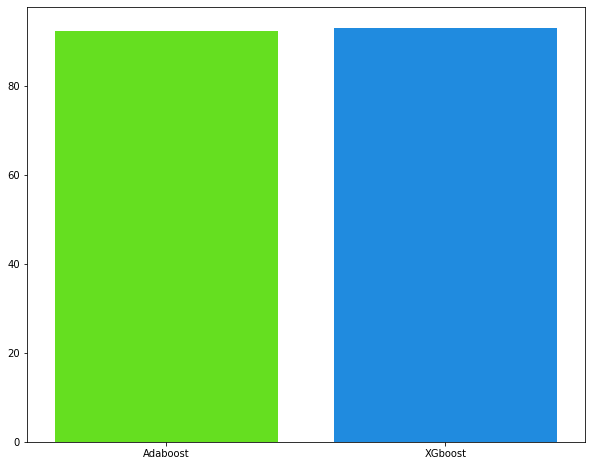

In [56]:
plt.figure(figsize=(10,8))
model_accuracies = list(accuracy.values())
model_names = list(accuracy.keys())
sns.barplot(x=model_accuracies, y=model_names, palette='gist_rainbow');

# Conclusion


We applied data exploration methods to understand the dataset better, and used the different data manupulation techniques
in python different libraries to take care of missing data.

Used Seaborn and Graph object to plot different interactive plots describing relationships among variables.

If we compare all Advanced Supervised learning method . We understand from above graph all Advanced  methods of Supervised learning are very good .